In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [62]:
# Defining the data
data = {
    'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Median_House_Price': [340000, 370000, 350000, 420000, 425000, 500000, 520000, 550000, 596000, 610000, 660000, 720000, 73000, 760000],
    'Westpac_Forecast': [56, 53, np.nan, 13, 33, -5, 45, 34, 34, 20, -20, 15, 5, -10],
    'Joe_Bloggs_Forecast': [23, 34, 19, 42, 23, 15, 1500, 18, 19, 23, 13, 8, 7, -2],
    'Harry_Spent_Forecast': [-20, -80, -70, -80, -50, -90, -30, np.nan, -110, -90, -60, -69, -80, -80]
}

In [64]:
# Creating DataFrame
df = pd.DataFrame(data)

In [67]:
# Removing rows with NaN values in forecast columns
df_clean = df.dropna(subset=['Westpac_Forecast', 'Joe_Bloggs_Forecast', 'Harry_Spent_Forecast'])

In [68]:
# Defining MAPE function
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [69]:
# Calculating MAPE for each forecaster
westpac_mape = calculate_mape(df_clean['Median_House_Price'], df_clean['Westpac_Forecast'])
joe_bloggs_mape = calculate_mape(df_clean['Median_House_Price'], df_clean['Joe_Bloggs_Forecast'])
harry_spent_mape = calculate_mape(df_clean['Median_House_Price'], df_clean['Harry_Spent_Forecast'])


In [70]:
print("Mean Absolute Percentage Error (MAPE) for each forecaster:")
print(f"Westpac: {westpac_mape:.2f}%")
print(f"Joe Bloggs: {joe_bloggs_mape:.2f}%")
print(f"Harry Spent: {harry_spent_mape:.2f}%")

Mean Absolute Percentage Error (MAPE) for each forecaster:
Westpac: 99.99%
Joe Bloggs: 99.97%
Harry Spent: 100.02%


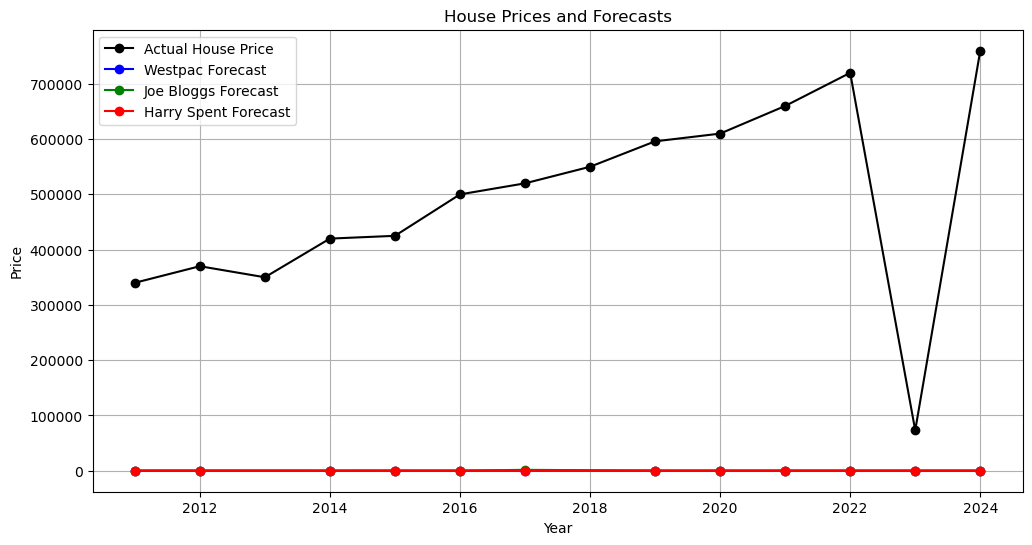

In [71]:
# Plotting actual vs forecasted prices
plt.figure(figsize=(12, 6))

plt.plot(df['Year'], df['Median_House_Price'], marker='o', label='Actual House Price', color='black')
plt.plot(df_clean['Year'], df_clean['Westpac_Forecast'], marker='o', label='Westpac Forecast', color='blue')
plt.plot(df_clean['Year'], df_clean['Joe_Bloggs_Forecast'], marker='o', label='Joe Bloggs Forecast', color='green')
plt.plot(df_clean['Year'], df_clean['Harry_Spent_Forecast'], marker='o', label='Harry Spent Forecast', color='red')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('House Prices and Forecasts')
plt.legend()
plt.grid(True)
plt.show()